# Heart Failure Classification

## Problem Statement
Heart failure is a critical condition often caused by cardiovascular diseases (CVDs). Early prediction of heart failure can aid in timely medical intervention and improve patient outcomes. This project involves implementing classification models to predict heart failure based on clinical features.

In [1]:
print('Welcome to This notebook!')

Welcome to This notebook!


## Dataset and Preparation

In [9]:
import pandas as pd
url = "https://drive.google.com/uc?export=download&id=1OvNEaSL4IitCzJqYtMNNUoF18kK7R_fn"
df = pd.read_csv(url)
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [10]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [13]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [14]:
label = 'HeartDisease'
X = df.drop(columns=[label])
y = df[label]

In [15]:
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM_SEED)
for train_val_index, test_index in sss1.split(X, y):
    X_train_val = X.iloc[train_val_index]
    y_train_val = y.iloc[train_val_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

In [16]:
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.125, random_state=RANDOM_SEED)
for train_index, val_index in sss2.split(X_train_val, y_train_val):
    X_train = X_train_val.iloc[train_index]
    y_train = y_train_val.iloc[train_index]
    X_val = X_train_val.iloc[val_index]
    y_val = y_train_val.iloc[val_index]

In [17]:
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (642, 11)
X_val shape: (92, 11)
X_test shape: (184, 11)
y_train shape: (642,)
y_val shape: (92,)
y_test shape: (184,)


In [18]:
def print_class_ratios(y, label):
    class_counts = y.value_counts(normalize=True)
    print(f"\nClass distribution in {label}:")
    print(class_counts)

print_class_ratios(y_train, "y_train")
print_class_ratios(y_val, "y_val")
print_class_ratios(y_test, "y_test")


Class distribution in y_train:
HeartDisease
1    0.55296
0    0.44704
Name: proportion, dtype: float64

Class distribution in y_val:
HeartDisease
1    0.554348
0    0.445652
Name: proportion, dtype: float64

Class distribution in y_test:
HeartDisease
1    0.554348
0    0.445652
Name: proportion, dtype: float64


In [19]:
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [20]:
print(f"numerical features: {numerical_features}")
print(f"categorical features features: {categorical_features}")

numerical features: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
categorical features features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [21]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [22]:
preprocessor = ColumnTransformer([
    ('numerical transformation phase', numerical_transformer, numerical_features),
    ('categorical transformation phase', categorical_transformer, categorical_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [23]:
X_train_transformed = pipeline.fit_transform(X_train)
X_val_transformed = pipeline.transform(X_val)
X_test_transformed = pipeline.transform(X_test)

print("Data splitting and preprocessing complete!")

Data splitting and preprocessing complete!


## Implementation Details

### Decision Tree Algorithm

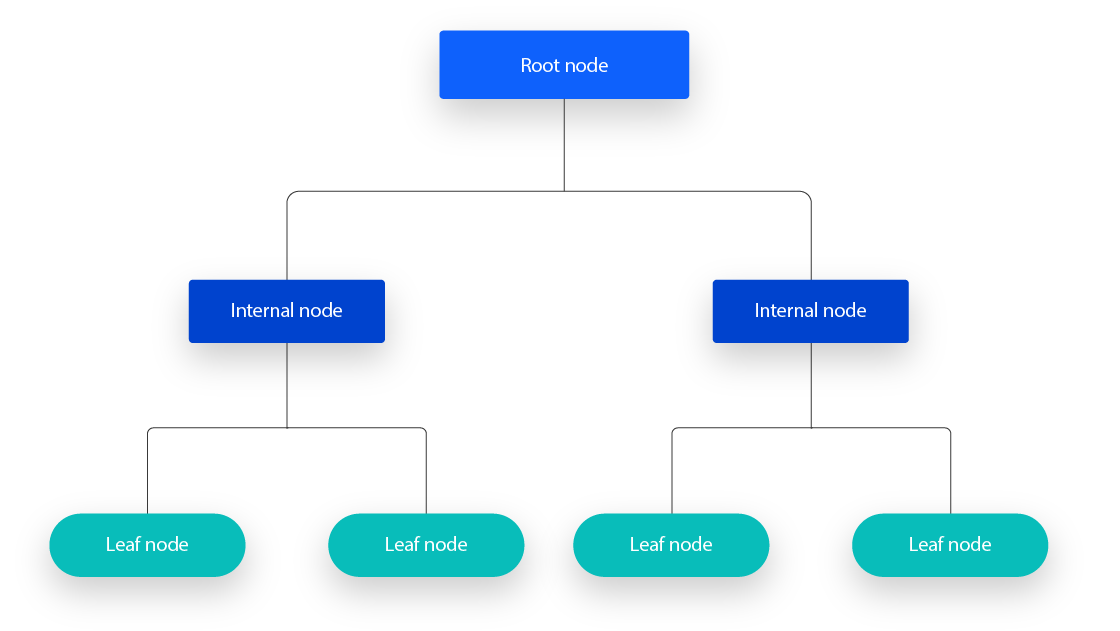

In [24]:
def entropy(y):
    m = len(y)
    if m == 0:
        return 0
    counts = np.bincount(y)
    probabilities = counts / m
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

In [25]:
def information_gain(y, y_left, y_right):
    m = len(y)
    gain = entropy(y)
    gain -= (len(y_left) / m) * entropy(y_left)
    gain -= (len(y_right) / m) * entropy(y_right)
    return gain

## Bagging Ensemble Algorithm
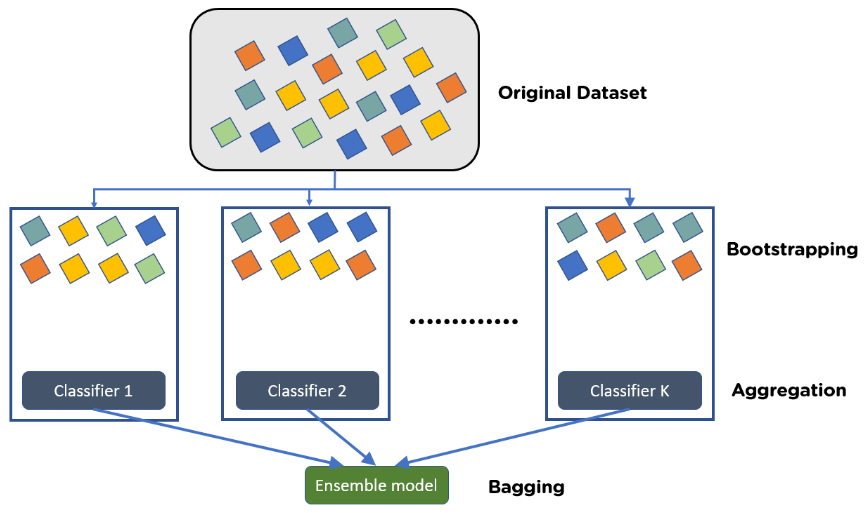

### AdaBoost Ensemble
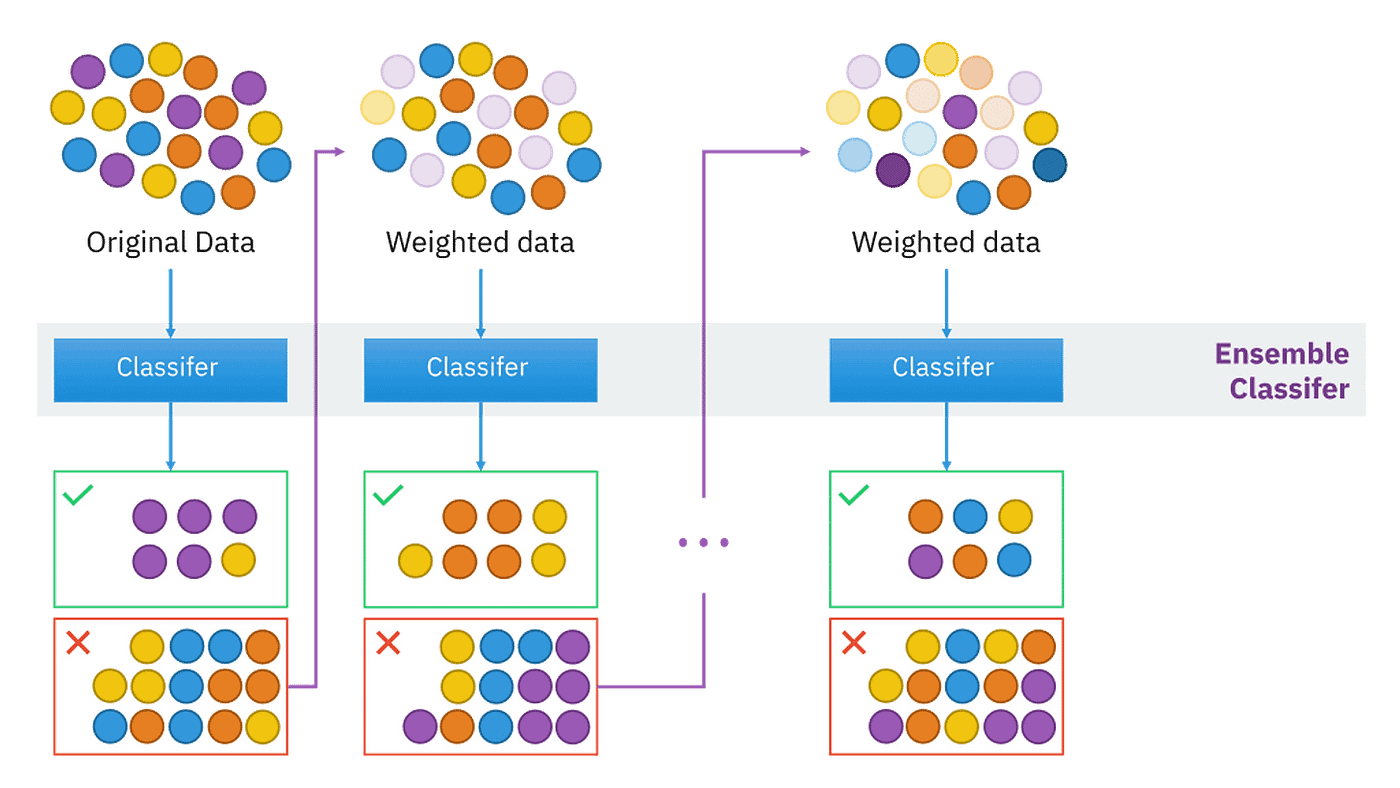